# Analisi tra i picchi delle variazioni positive e negative degli NFT e la sentimental analysis

## Import libraries and dataframes

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os

In [39]:
top_10_positivi = pd.read_csv("../dataframes/top_10_positivi_df.csv")
top_10_negativi = pd.read_csv("../dataframes/top_10_negativi_df.csv")
tweets_sentiment= pd.read_csv("../dataframes/tweets_sentiment_df.csv")

# Convertire le colonne di data in formato datetime
top_10_negativi['data_inizio'] = pd.to_datetime(top_10_negativi['data_inizio'])
top_10_negativi['data_fine'] = pd.to_datetime(top_10_negativi['data_fine'])
top_10_positivi['data_inizio'] = pd.to_datetime(top_10_positivi['data_inizio'])
top_10_positivi['data_fine'] = pd.to_datetime(top_10_positivi['data_fine'])
tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

In [40]:
# Stampa gli attributi del dataframe top_nft_positivi
#print("Attributi del dataframe 'top_10_positivi':")
#print(top_10_positivi.info())

In [41]:
# Stampa gli attributi del dataframe top_nft_negativi
#print("\nAttributi del dataframe 'top_10_negativi':")
#print(top_10_negativi.info())

In [42]:
# Stampa gli attributi del dataframe tweets_sentiment
#print("\nAttributi del dataframe 'tweets_sentiment':")
#print(tweets_sentiment.info())

# Analisi dei 10 NFT NEGATIVI

## Definizione della funzione e preparazione dei dati

Abbiamo esaminato solo i 3 giorni antecedenti alla data di inizio della variazione fino alla data di fine per ogni token

In [43]:
# Funzione per filtrare i tweet nei periodi specificati e calcolare la distribuzione del sentiment
def get_daily_sentiment(data_inizio, data_fine, period_days=3):
    period_start = data_inizio - pd.Timedelta(days=period_days)
    period_end = data_fine
    tweets_period = tweets_sentiment[(tweets_sentiment['created_at'] >= period_start) &
                                     (tweets_sentiment['created_at'] <= period_end)]
    
    # Raggruppare per giorno e calcolare la distribuzione del sentiment
    tweets_period['day'] = tweets_period['created_at'].dt.floor('D')
    daily_sentiment = tweets_period.groupby(['day', 'Sentiment']).size().unstack(fill_value=0)
    daily_sentiment = daily_sentiment.apply(lambda x: x / x.sum(), axis=1)
    return daily_sentiment

# Applicare la funzione a ciascun record
daily_sentiment_list = []
for idx, row in top_10_negativi.iterrows():
    token_id = row['token_id']
    data_inizio = row['data_inizio']
    data_fine = row['data_fine']
    daily_sentiment = get_daily_sentiment(data_inizio, data_fine)
    daily_sentiment['token_id'] = token_id
    daily_sentiment_list.append(daily_sentiment)

# Concatenare i risultati in un unico DataFrame
daily_sentiment_df = pd.concat(daily_sentiment_list).reset_index()

/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_774/1446099345.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_period['day'] = tweets_period['created_at'].dt.floor('D')
/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_774/1446099345.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_period['day'] = tweets_period['created_at'].dt.floor('D')
/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_774/1446099345.py:9: SettingWithCopyWarning: 
A value is trying to be s

## Creazione di grafici a linee per ciascun token

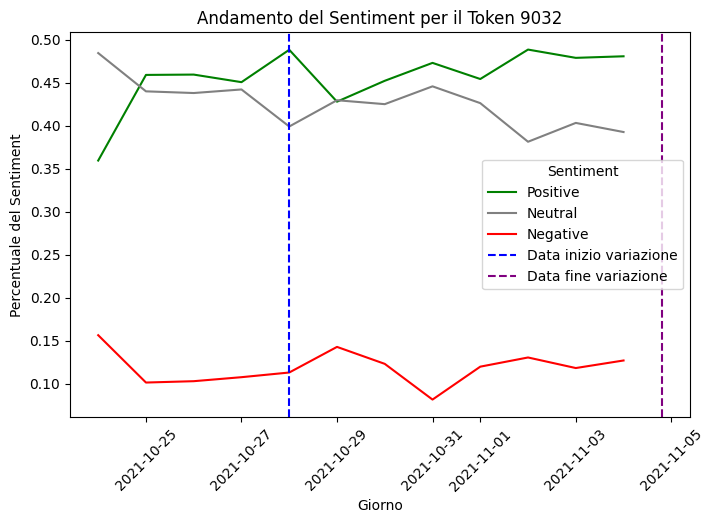

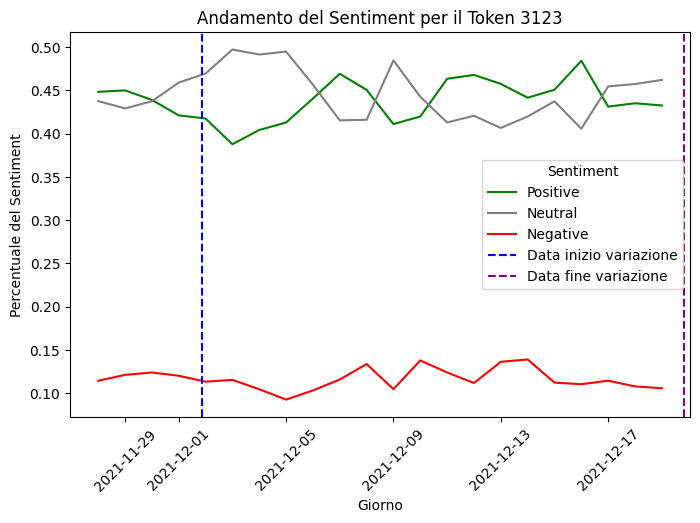

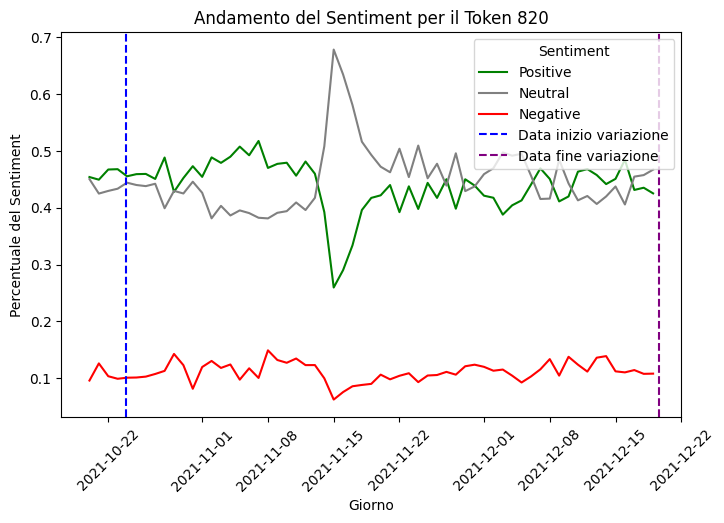

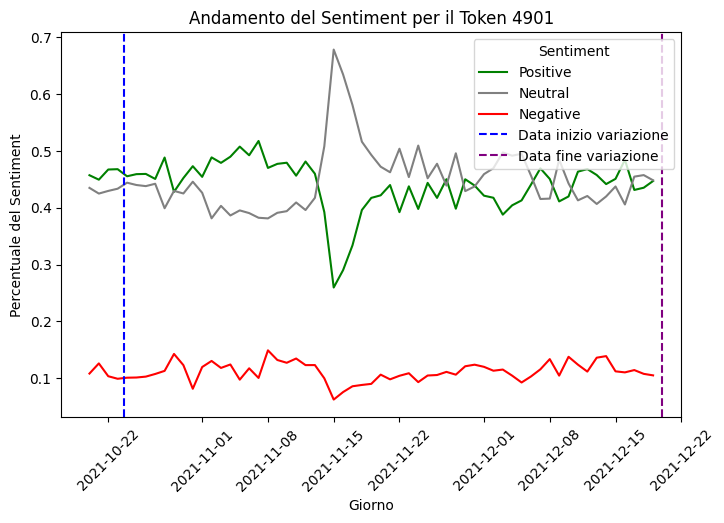

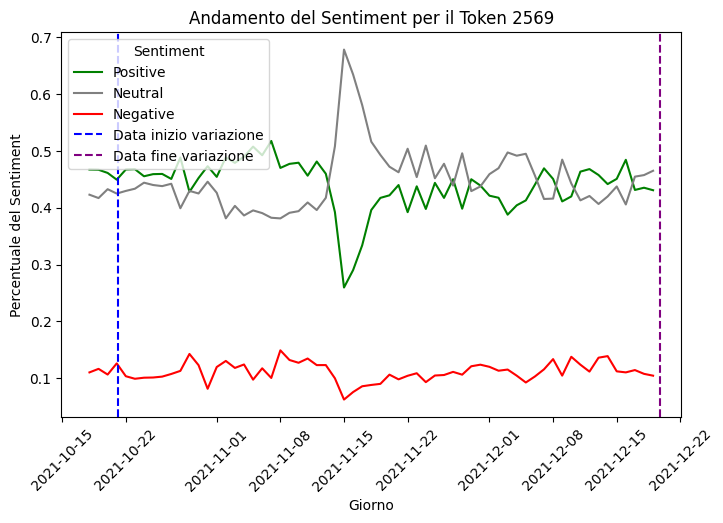

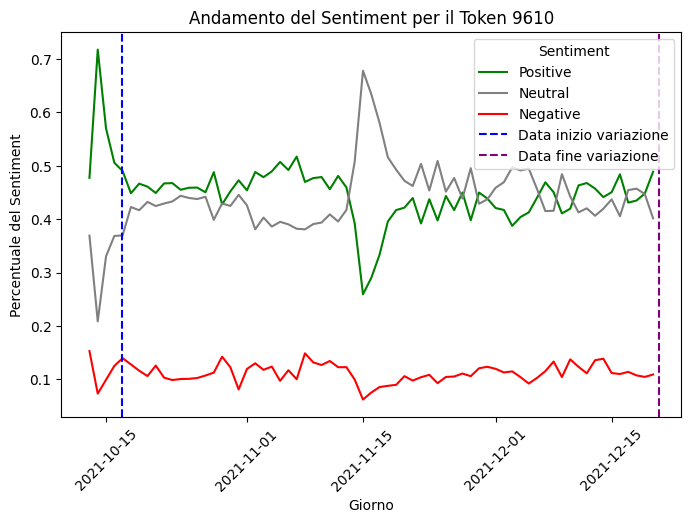

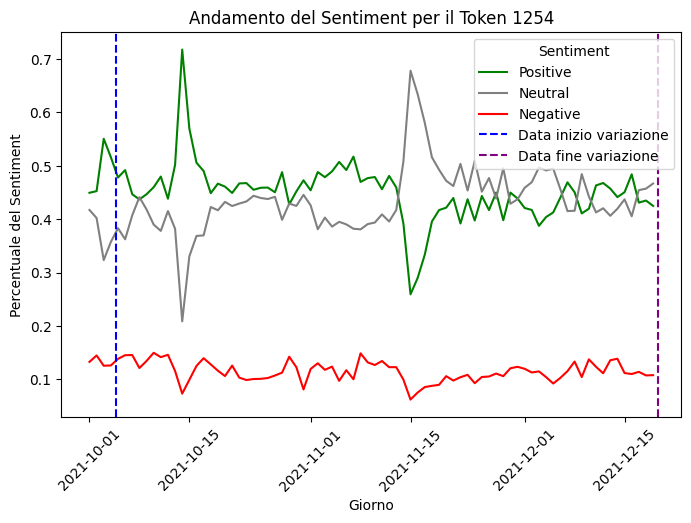

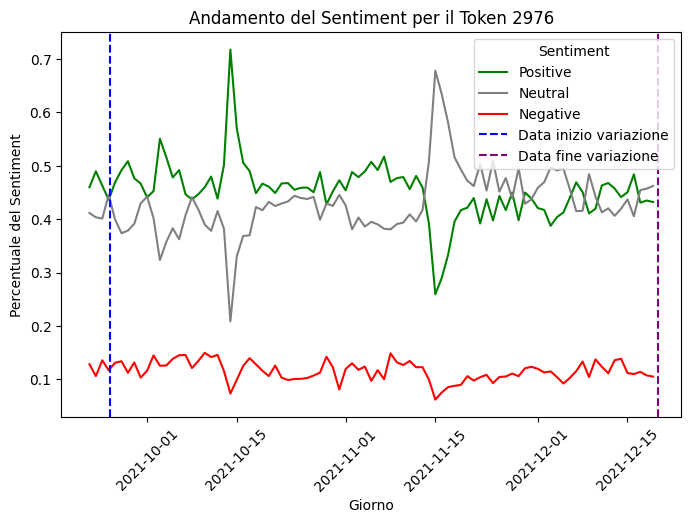

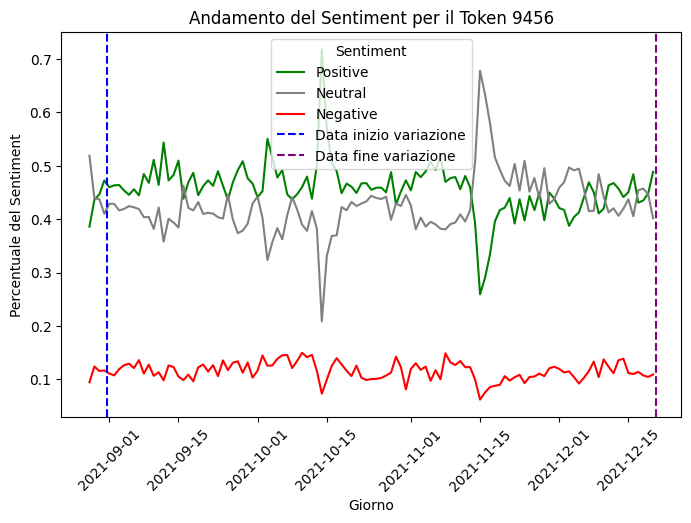

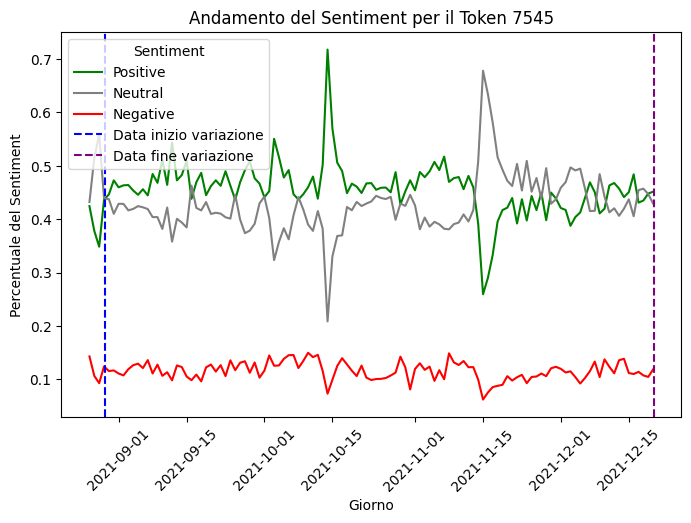

In [44]:
# Creare i grafici a linee per ciascun token
for token_id in top_10_negativi['token_id']:
    token_sentiment_df = daily_sentiment_df[daily_sentiment_df['token_id'] == token_id]
    data_inizio = top_10_negativi[top_10_negativi['token_id'] == token_id]['data_inizio'].values[0]
    data_fine = top_10_negativi[top_10_negativi['token_id'] == token_id]['data_fine'].values[0]
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=token_sentiment_df, x='day', y='Positive', label='Positive', color='green')
    sns.lineplot(data=token_sentiment_df, x='day', y='Neutral', label='Neutral', color='grey')
    sns.lineplot(data=token_sentiment_df, x='day', y='Negative', label='Negative', color='red')
    plt.title(f'Andamento del Sentiment per il Token {token_id}')
    plt.xlabel('Giorno')
    plt.ylabel('Percentuale del Sentiment')
    
    # Annotazioni per le date di inizio e fine variazione
    plt.axvline(data_inizio, color='blue', linestyle='--', label='Data inizio variazione')
    plt.axvline(data_fine, color='purple', linestyle='--', label='Data fine variazione')
    
    plt.legend(title='Sentiment')
    plt.xticks(rotation=45)
    
    plt.show()


# Analisi dei 10 NFT POSITIVI

## Definizione della funzione e preparazione dei dati

Abbiamo esaminato solo i 3 giorni antecedenti alla data di inizio della variazione fino alla data di fine per ogni token

In [45]:
# Applicare la funzione a ciascun record
daily_sentiment_list = []
for idx, row in top_10_positivi.iterrows():
    token_id = row['token_id']
    data_inizio = row['data_inizio']
    data_fine = row['data_fine']
    daily_sentiment = get_daily_sentiment(data_inizio, data_fine)
    daily_sentiment['token_id'] = token_id
    daily_sentiment_list.append(daily_sentiment)

# Concatenare i risultati in un unico DataFrame
daily_sentiment_df = pd.concat(daily_sentiment_list).reset_index()


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_774/1446099345.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_period['day'] = tweets_period['created_at'].dt.floor('D')
/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_774/1446099345.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_period['day'] = tweets_period['created_at'].dt.floor('D')
/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_774/1446099345.py:9: SettingWithCopyWarning: 
A value is trying to be s

## Creazione di grafici a linee per ciascun token

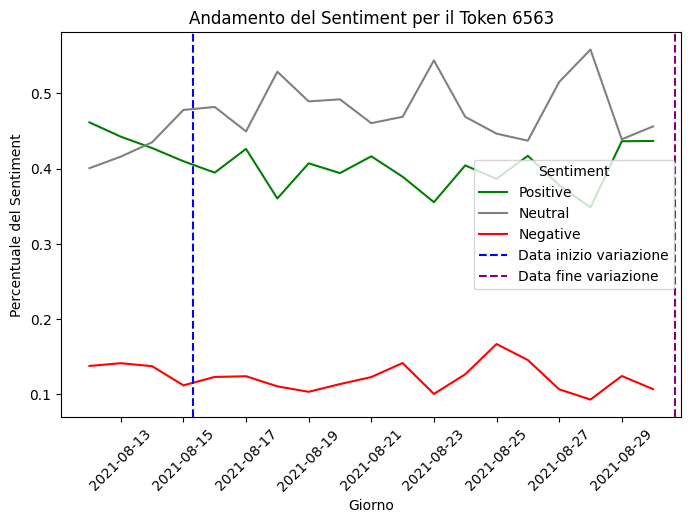

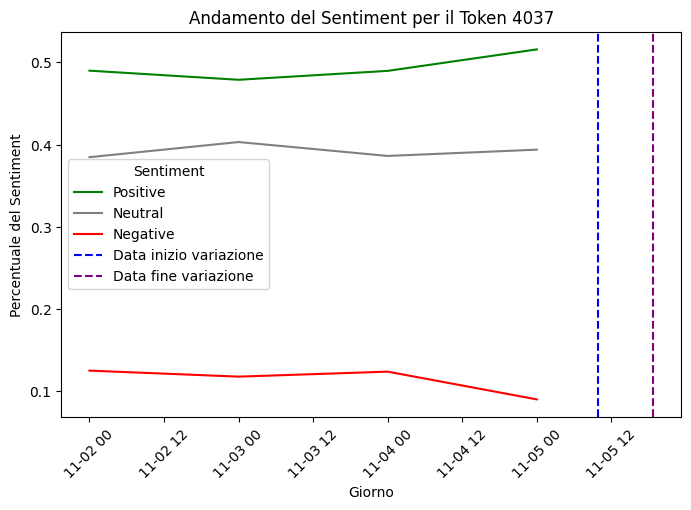

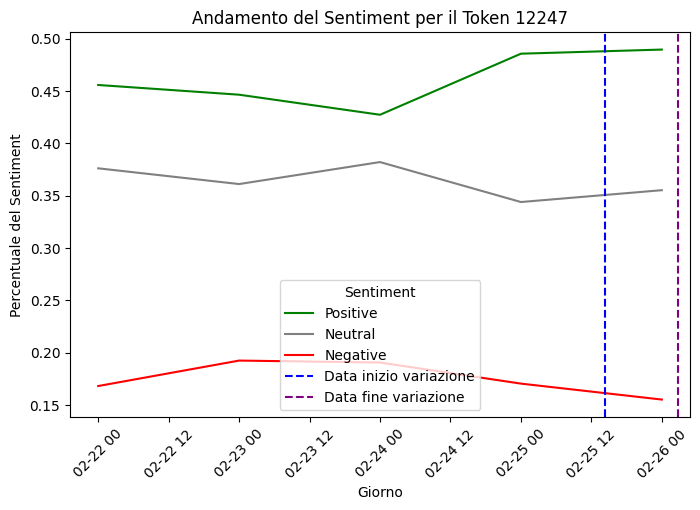

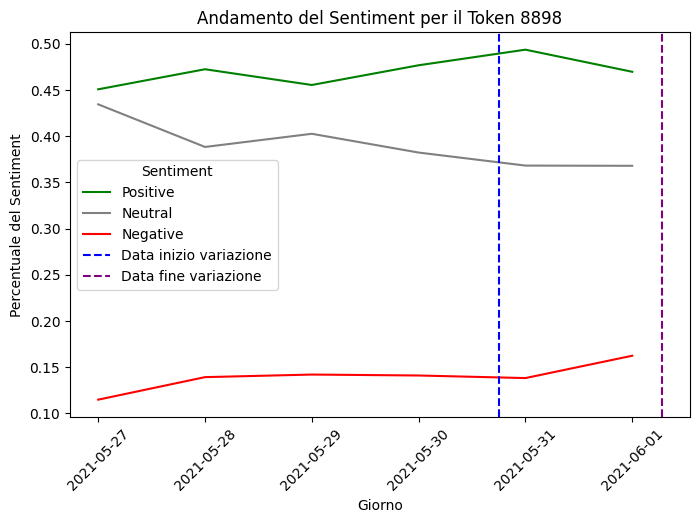

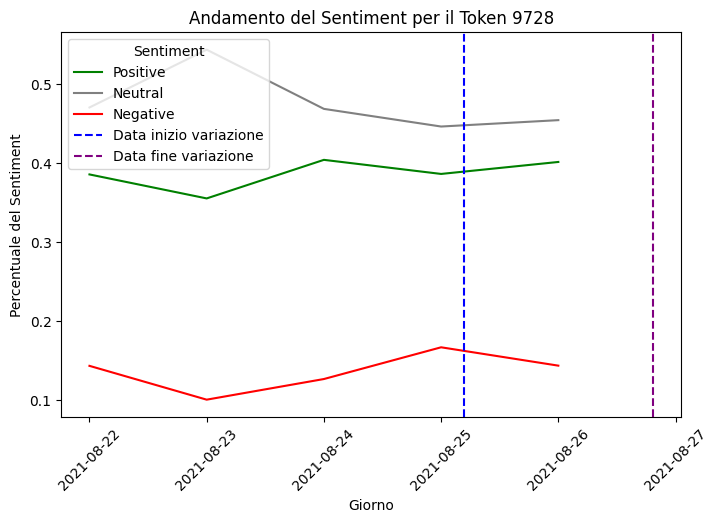

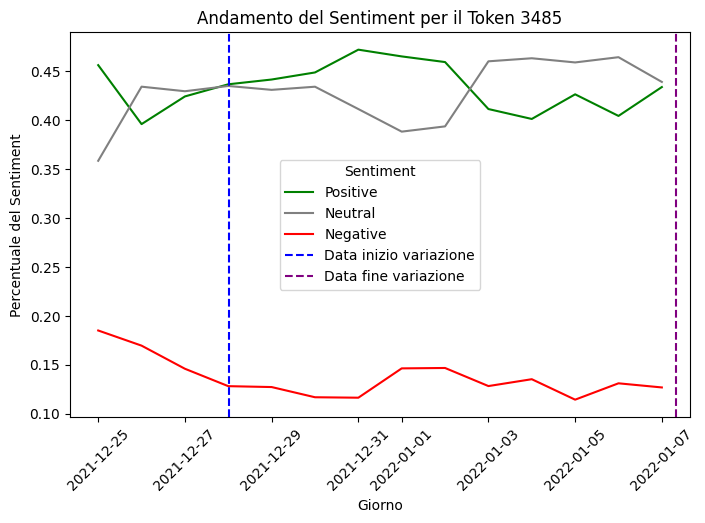

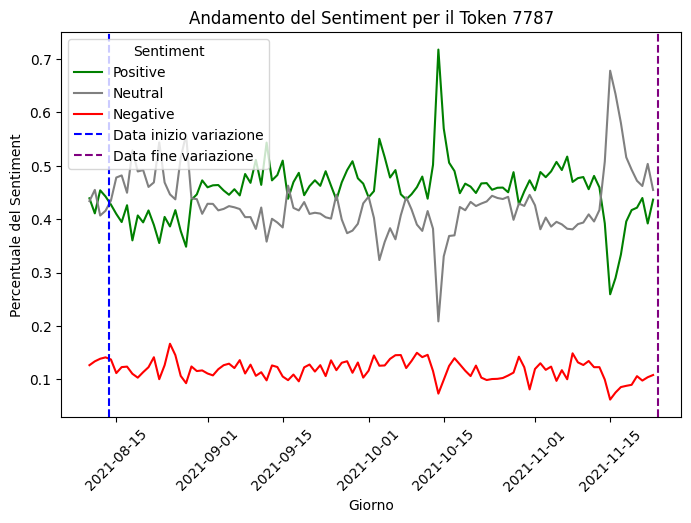

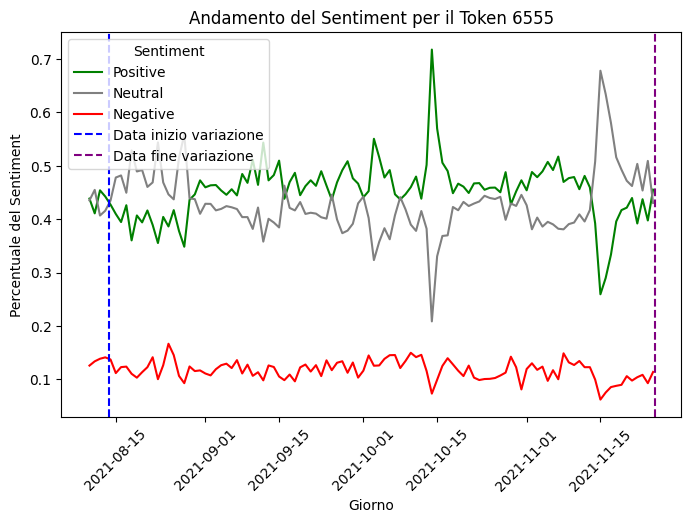

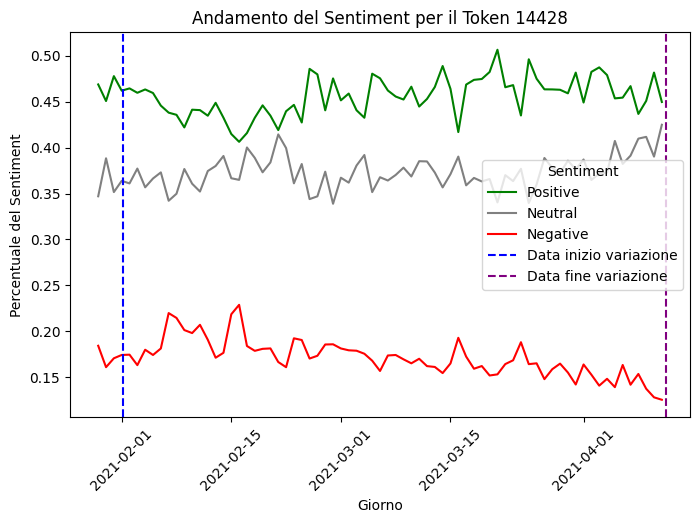

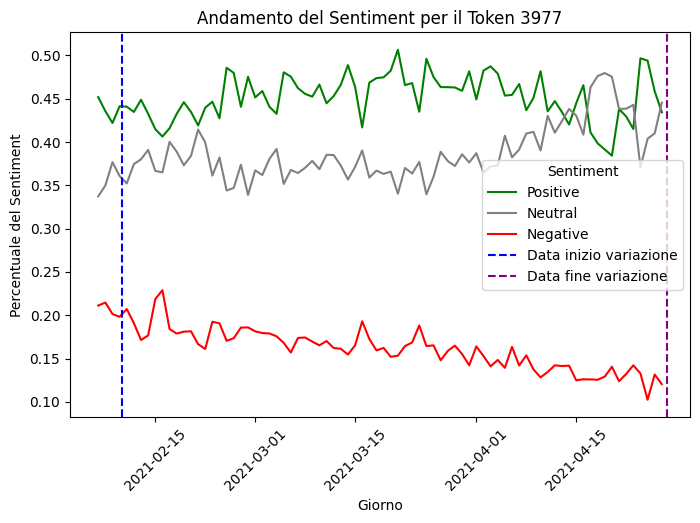

In [46]:
# Creare i grafici a linee per ciascun token
for token_id in top_10_positivi['token_id']:
    token_sentiment_df = daily_sentiment_df[daily_sentiment_df['token_id'] == token_id]
    data_inizio = top_10_positivi[top_10_positivi['token_id'] == token_id]['data_inizio'].values[0]
    data_fine = top_10_positivi[top_10_positivi['token_id'] == token_id]['data_fine'].values[0]
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=token_sentiment_df, x='day', y='Positive', label='Positive', color='green')
    sns.lineplot(data=token_sentiment_df, x='day', y='Neutral', label='Neutral', color='grey')
    sns.lineplot(data=token_sentiment_df, x='day', y='Negative', label='Negative', color='red')
    plt.title(f'Andamento del Sentiment per il Token {token_id}')
    plt.xlabel('Giorno')
    plt.ylabel('Percentuale del Sentiment')
    
    # Annotazioni per le date di inizio e fine variazione
    plt.axvline(data_inizio, color='blue', linestyle='--', label='Data inizio variazione')
    plt.axvline(data_fine, color='purple', linestyle='--', label='Data fine variazione')
    
    plt.legend(title='Sentiment')
    plt.xticks(rotation=45)
    
    plt.show()


## Altre analisi